KNN CLASSIFICATION
Accuracy: 0.8333333333333334

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.78      0.74         9
           2       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30



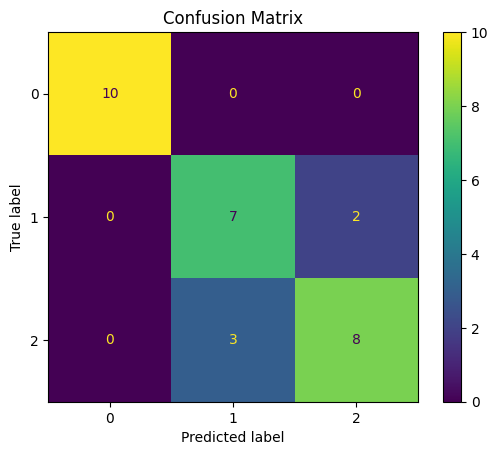

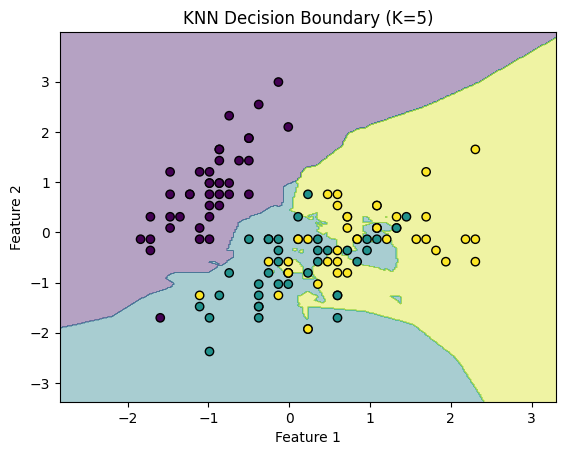

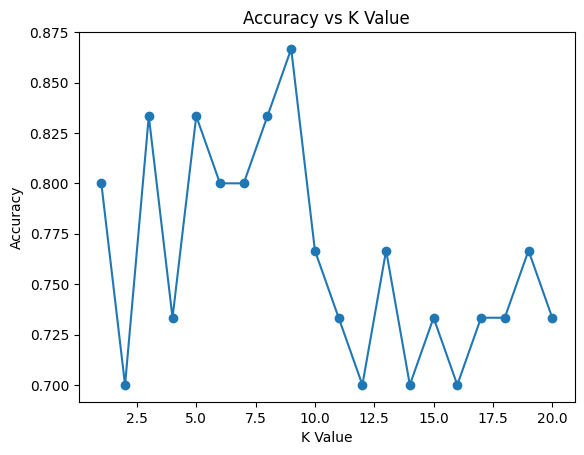

In [1]:
# ======================================================
# MACHINE LEARNING LAB
# KNN CLASSIFICATION AND KNN REGRESSION
# ======================================================

# ==========================
# IMPORT LIBRARIES
# ==========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, classification_report,
                             mean_squared_error, r2_score)

# ======================================================
# PART 1: KNN CLASSIFICATION
# ======================================================

print("===================================================")
print("KNN CLASSIFICATION")
print("===================================================")

# Load Iris Dataset
iris = load_iris()

# Take first 2 features for visualization
X = iris.data[:, :2]
y = iris.target

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Model
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Predictions
y_pred = knn_clf.predict(X_test)

# Output
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# --------------------------
# GRAPH 1: Confusion Matrix
# --------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# --------------------------
# GRAPH 2: Decision Boundary
# --------------------------
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k')
plt.title("KNN Decision Boundary (K=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# --------------------------
# GRAPH 3: Accuracy vs K
# --------------------------
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value")
plt.show()